# Práctica 6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
housing = pd.read_csv('housing.csv')

## Vemos la estructura de los datos

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


El método info() es útil para obtener una descripción rápida de los datos, en particular el número total de filas, y el tipo de cada atributo y el número de valores no nulos

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
print('Observación: El feature total_bedrooms no tiene '+str(20640-20433)+' valores.')

Observación: El feature total_bedrooms no tiene 207 valores.


Todos los atributos son numéricos, excepto el campo ocean_proximity. Su tipo es objeto, por lo que podría contener cualquier tipo de objeto Python, pero dado que cargó estos datos desde un archivo CSV sabes que debe ser un atributo de texto. Cuando miraste las cinco filas superiores, probablemente notó que los valores en la columna ocean_proximity eran repetitivos, lo que significa que probablemente sea un atributo categórico. uedes averiguar cuales son las categorías que existen y cuántos distritos pertenecen a cada categoría utilizando el método value_counts ():



In [6]:
#Atributo categórico
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

El método describe() muestra un resumen de atributos numéricos



In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Las filas count, mean, min y max se explican por sí mismas. Tenga en cuenta que los valores nulos son ignorado (por ejemplo, el recuento de total_bedrooms es 20.433, no 20.640).

   * El std La fila muestra la desviación estándar, que mide qué tan dispersos están los valores.
    * Las filas del 25%, 50% y 75% muestran los percentiles correspondientes: un indice de percentiles determina el valor por debajo del cual un porcentaje dado de observaciones en un grupo de observaciones caídas Por ejemplo,
    * El 25% de los distritos tienen una edad media de vivienda inferior a 18, mientras que el 50% son inferiores a 29 y el 75% son inferiores a 37.
    
A menudo se les llama Percentil 25 (o primer cuartil), la mediana y el percentil 75 (o tercer cuartil).

#### Histogramas
Otra forma rápida de tener una idea del tipo de datos que está tratando es trazar un histograma para cada atributo numérico. Un histograma muestra el número de instancias. (en el eje vertical) que tienen un rango de valores dado (en el eje horizontal). Usted puede trazar este atributo a la vez o puede llamar al método hist() en conjunto de datos completo, y trazará un histograma para cada atributo numérico

C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

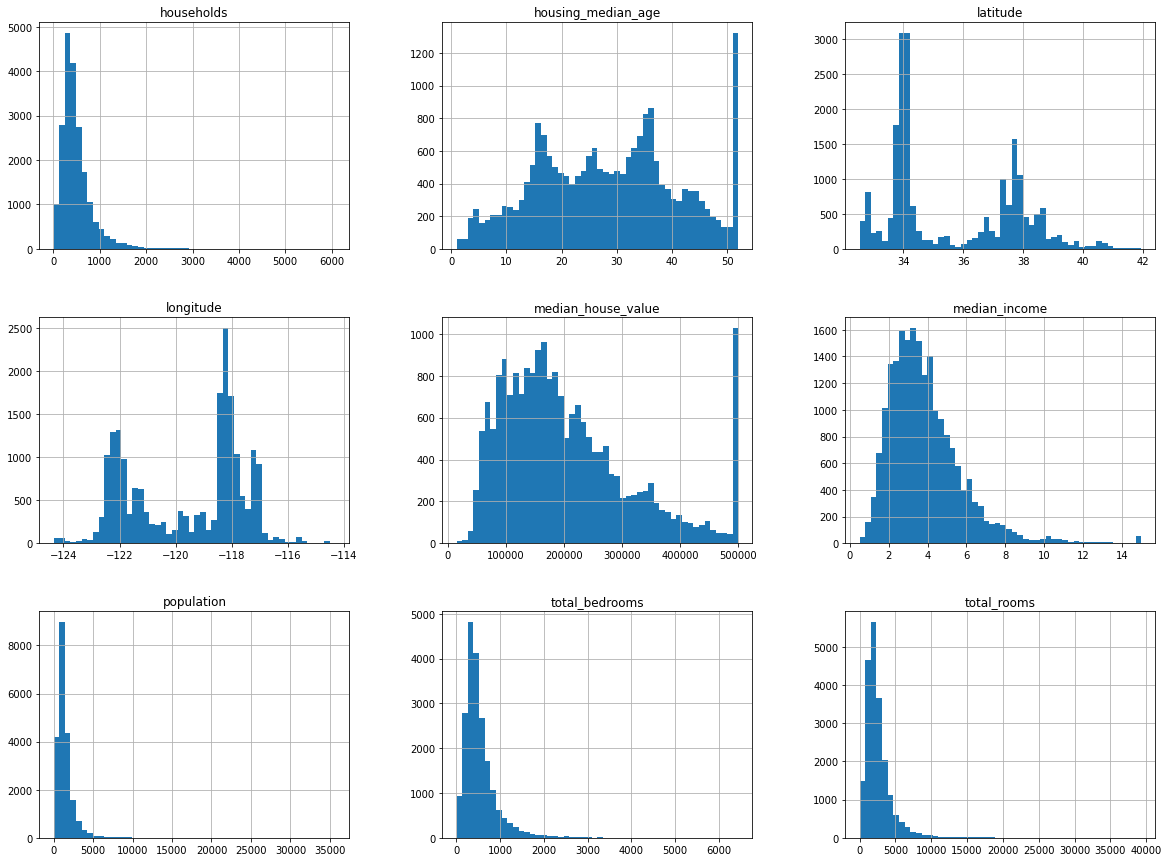

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Análisis de histogramas
  1. Primero, el atributo de ingreso medio no parece expresarse en dólares estadounidenses. (DÓLAR ESTADOUNIDENSE). Después de consultar con el equipo que recopiló los datos, se le informa que el los datos han sido escalados y limitados a 15 (en realidad 15,0001) para una mediana más alta ingresos, y en 0.5 (en realidad 0.4999) para ingresos medios más bajos. Los números representan aproximadamente decenas de miles de dólares (por  ejemplo, 3 en realidad significa aproximadamente 30,000). Trabajar con atributos preprocesados es común en Machine Learning, y no es necesariamente un problema, pero debe intentar comprender cómo Los datos fueron calculados.
  2. La edad media de la vivienda y el valor medio de la vivienda también se limitaron. Puede ser un problema grave ya que es su atributo de destino (sus etiquetas). Tu Los algoritmos de Machine Learning pueden aprender que los precios nunca van más allá de ese límite. Debe consultar con su equipo de clientes (el equipo que utilizará el sistema externo de su sistema) para ver si esto es un problema o no. Si te dicen que necesitan una precisión previa dicciones incluso más allá de 500,000, entonces tiene principalmente dos opciones:
     - a. Reúna las etiquetas apropiadas para los distritos cuyas etiquetas fueron tapadas. 
     - b. Eliminar esos distritos del conjunto de capacitación (y también del conjunto de prueba, ya que su sistema no debe evaluarse mal si predice valores más allá 500,000).
     
  3. Estos atributos tienen escalas muy diferentes.
  4. Finalmente, muchos histogramas son pesados: se extienden mucho más a la derecha de la mediana que a la izquierda. Esto puede hacer que sea un poco más difícil para algunas máquinas Algoritmos de aprendizaje para detectar patrones. Intentaremos transformar estos atributos


## Crear un conjunto de prueba
Su cerebro es un sorprendente sistema de detección de patrones, lo que significa que es altamente propenso al sobreajuste: si observa el conjunto de prueba, puede tropezar con algunos aparentemente patrónes interesantes en los datos de prueba que lo lleva a seleccionar un tipo particular de Modelo de aprendizaje automático. Cuando estima el error de generalización usando la prueba establecida, su estimación será demasiado optimista y lanzará un sistema que no rendirá tan bien como se esperaba. Esto se llama sesgo de espionaje de datos. Crear un conjunto de prueba es teóricamente bastante simple: solo elija algunas instancias al azar, normalmente el 20% del conjunto de datos (o menos si su conjunto de datos es muy grande), y déjelos a un lado:

In [9]:
def split_train_test(data, test_ratio):
     shuffled_indices = np.random.permutation(len(data))
     test_set_size = int(len(data) * test_ratio)
     test_indices = shuffled_indices[:test_set_size]
     train_indices = shuffled_indices[test_set_size:]
     return data.iloc[train_indices], data.iloc[test_indices]

Luego puede usar esta función de esta manera:

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)

Vemos los tamaños de los conjuntos de entrenamiento y testeo

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

Para evitar que el conjunto de datos de prueba cambie cada que se corre el programa podría calcular un hash del identificador de cada instancia y si el hash es menor o igual al 20% del valor de hash máximo poner esa instancia en el conjunto de prueba. Esta garantiza que el conjunto de prueba se mantendrá constante en varias ejecuciones, incluso si actualiza el conjunto de datos. El nuevo conjunto de prueba contendrá el 20% de las nuevas instancias. Aquí hay un posible implementación:

In [13]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
    
def split_train_test_by_id(data, test_ratio, id_column):
     ids = data[id_column]
     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
     return data.loc[~in_test_set], data.loc[in_test_set]

Desafortunadamente, el conjunto de datos de la vivienda no tiene una columna de identificación. Lo más simple la solución es usar el índice de fila como ID:

In [14]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Si usa el índice de fila como un identificador único, debe asegurarse de que los datos nuevos se agrega al final del conjunto de datos y nunca se elimina ninguna fila. Si esto no es posible, entonces puede intentar usar las características más estables para construir un identificador único.

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Scikit-Learn proporciona algunas funciones para **dividir conjuntos de datos en múltiples subconjuntos** en varias formas. La función más simple es **train_test_split**, que hace más o menos lo mismo cosa como la función split_train_test definida anteriormente, con un par de caracteristicas. Primero hay un parámetro random_state que le permite establecer el azar
generador de semillas, y en segundo lugar puede pasarle múltiples conjuntos de datos con un número idéntico de filas, y las dividirá en los mismos índices (esto es muy útil, por ejemplo, si tiene un DataFrame separado paor etiquetas:

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Supongamos que conversó con expertos que le dijeron que el ingreso medio es un atributo muy importante para predecir los precios medios de la vivienda. Es posible que desee asegurarse de que el conjunto de pruebas es representativo de las diversas categorías de ingresos en todo el conjunto de datos.Como el ingreso medio es un atributo numérico continuo, primero debe crear un atributo de categoría de ingresos.la mayoría de los valores de ingresos medios se agrupan alrededor de 1.5 a 6 (es decir, 15,000– 60,000), pero algunos ingresos medios van mucho más allá de 6. Es importante tener
un número suficiente de instancias en su conjunto de datos para cada estrato, o bien la estimación de la importancia del 
estrato puede ser parcial. Esto significa que no deberías tener demasiados estratos, y cada estrato debe ser lo suficientemente 
grande. El siguiente código usa la función **pd.cut()** para crear un atributo de categoría de ingresos con 5 categorías (etiquetadas de 1 a 5): la categoría 1 varía de 0 a 1.5 (es decir, menos de $ 15,000), la categoría 2 de
1.5 a 3, y así sucesivamente:

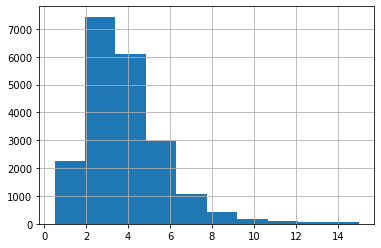

In [17]:
housing.median_income.hist()
plt.show()

Vemos el histograma de los datos categorizados

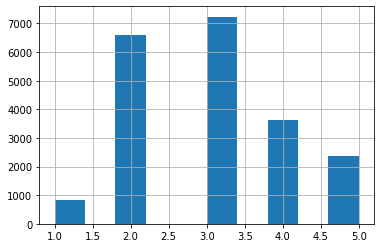

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
plt.show()

Ahora está listo para hacer un muestreo estratificado en función de la categoría de ingresos. Para esto puedes usar la clase StratifiedShuffleSplit de Scikit-Learn:

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Para ver si esto funcionó como se esperaba. Puedes comenzar mirando la categoría de ingresos proporcionados en el conjunto de prueba:

In [20]:
General=(housing["income_cat"].value_counts() / len(housing)).sort_index(axis=0)


train_set["income_cat"] = pd.cut(train_set["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
Muest_Al = (train_set["income_cat"].value_counts() / len(train_set)).sort_index(axis=0)

Muest_Est = (strat_test_set["income_cat"].value_counts() / len(strat_test_set)).sort_index(axis=0)

Al_Error = 100* General/Muest_Al -100
Est_Error = 100*General/Muest_Est -100

C:\Users\Mary\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
pd.DataFrame({'Overall': General, 'Random': Muest_Est, 'Stratified': Muest_Al, 'Rnad. %error': Al_Error, 'Strat. %error': Est_Error})

,Overall,Random,Stratified,Rnad. %error,Strat. %error
1,0.039826,0.039729,0.039729,0.243902,0.243902
2,0.318847,0.318798,0.317466,0.434948,0.015198
3,0.350581,0.350533,0.348595,0.569840,0.013822
4,0.176308,0.176357,0.178537,-1.248304,-0.027473
5,0.114438,0.114583,0.115673,-1.068063,-0.126850


Ahora debe eliminar el atributo ingreso_cat para que los datos vuelvan a su estado original.

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Descubrimiento y visualización de los datos para obtener información

Vamos a crear una copia para que puedas jugar con ella sin dañar el conjunto de entrenamiento:

In [23]:
housing = strat_train_set.copy()

### Visualización de datos geográficos
Como hay información geográfica (latitud y longitud), es una buena idea cree un diagrama de dispersión de todos los distritos para visualizar los datos.

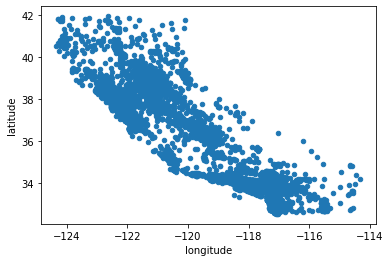

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

Aquí es difícil ver algún modelo en particular.Establecer la opción alfa en 0.1 hace que sea mucho más fácil visualizar los lugares donde hay una alta densidad de puntos de datos

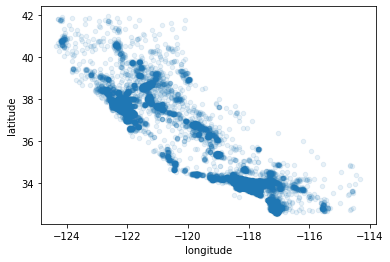

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

Ahora veamos los precios de las viviendas

C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Mary\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

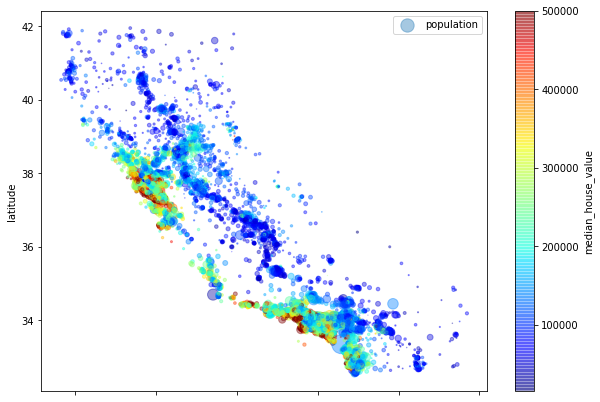

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", 
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

Esta imagen le dice que los precios de la vivienda están muy relacionados con la ubicación. (por ejemplo, cerca del océano) y de la densidad de población, como probablemente ya sabías. Probablemente será útil usar un algoritmo de agrupación para detectar los grupos principales, y agregar nuevas características que midan la proximidad a los centros de clúster.

## Buscando correlaciones
Dado que el conjunto de datos no es demasiado grande, puede calcular fácilmente la **correlación estándar(también llamada r de Pearson)** entre cada par de atributos usando el método **corr()**

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

El **coeficiente de correlación varía de –1 a 1**. Cuando está cerca de 1, significa que hay una fuerte correlación positiva; por ejemplo, el valor medio de la vivienda tiende a irse cuando la renta media aumenta. Cuando el coeficiente está cerca de –1, significa que hay una fuerte correlación negativa; puedes ver una pequeña correlación negativa entre la latitud y el valor medio de la vivienda (es decir, los precios tienen una ligera tendencia a
baja cuando vayas al norte). Finalmente, los coeficientes cercanos a cero significan que no hay correlación lineal. En la siguiente imagen se puede apreciar.

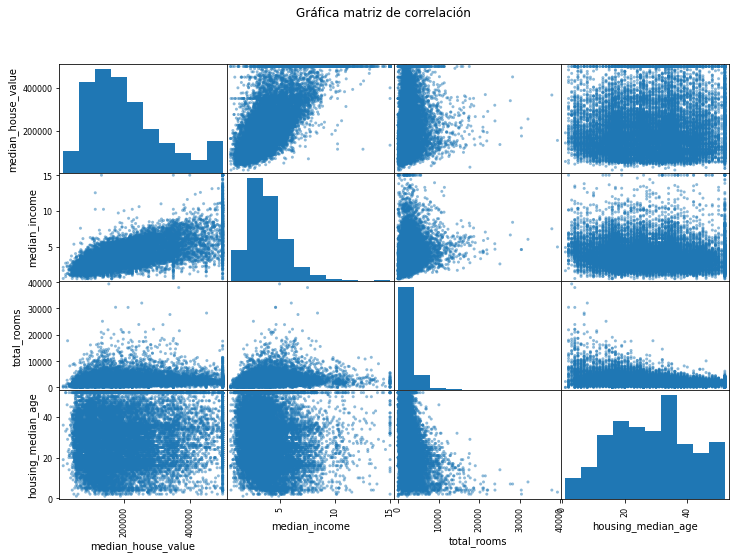

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.suptitle('Gráfica matriz de correlación')

plt.show()

La diagonal principal (superior izquierda a inferior derecha) estaría llena de líneas rectas si Pandas trazó cada variable contra sí misma, lo que no sería muy útil. Entonces, en lugar de pandas muestra un histograma de cada atributo. El atributo más prometedor para predecir el valor medio de la casa es la mediana de ingresos, así que ampliemos su diagrama de dispersión de correlación:

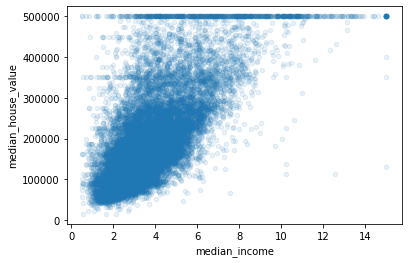

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

## Experimentando con combinaciones de atributos
Una última cosa que puede hacer antes de preparar los datos para que la máquina aprenda algoritmos es probar varias combinaciones de atributos. Por ejemplo, el número total de habitaciones en un distrito no es muy útil si no sabe cuántos hogares hay. Lo que realmente quiere es la cantidad de habitaciones por hogar. Del mismo modo, el número total de dormitorios por sí solo no es muy útil: probablemente quiero compararlo con la cantidad de habitaciones.

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
#Veamos de nuevo la matriz de correlación.
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

No está mal. El nuevo atributo bedrooms_per_room está mucho más correlacionado con el valor medio de la casa que el número total de habitaciones o dormitorios. Aparentemente las casas con una relación dormitorio/habitación más baja tienden a ser más caras. El número de las habitaciones por hogar también son más informativas que el número total de habitaciones en un distrito, obviamente, cuanto más grandes son las casas, más caras son.

Esta ronda de exploración no tiene que ser absolutamente exhaustiva; el punto es comienzar con el pie derecho y obtener rápidamente información que ayudará a obtener un buen prototipo. Pero este es un proceso iterativo: una vez que obtienes un prototipo y lo ejecutas, puede analizar su salida para obtener más información y volver a este Paso de exploración.

## Preparar los datos para algoritmos de aprendizaje automático

Es hora de preparar los datos para sus algoritmos de Machine Learning. En lugar de solo hacer esto manualmente, debe escribir funciones para hacerlo, por varias buenas razones:

   * Esto le permitirá reproducir estas transformaciones fácilmente en cualquier conjunto de datos (por ejemplo,la próxima vez que obtenga un nuevo conjunto de datos).
   * Creará gradualmente una biblioteca de funciones de transformación que puede reutilizar en futuros proyectos.
   
   * Esto le permitirá probar fácilmente varias transformaciones y ver qué combinación de transformaciones funciona mejor.


In [32]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Limpieza de datos

La mayoría de los algoritmos de Machine Learning no pueden funcionar con valores faltantes, así que creemos algunas funciones para cuidarlos. Notaste anteriormente que el atributo total_bedrooms tiene algunos valores faltantes, así que para arreglar esto. Tienes tres opciones:

   * Deshágase de los distritos correspondientes.
   * Deshágase de todo el atributo.
   * Establezca los valores en algún valor (cero, la media, la mediana, etc.).


Esto se puede lograr fácilmente con los métodos **dropna(), drop() y fillna()**

In [33]:
housing.dropna(subset=["total_bedrooms"]) 
housing.drop("total_bedrooms", axis=1) 
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

Si elige la opción 3, debe calcular el valor medio en el conjunto de entrenamiento, y usarlo para completar los valores faltantes en el conjunto de entrenamiento.

**Scikit-Learn** proporciona una clase útil para cuidar los valores perdidos: **SimpleImputer**.
Para usarlo, primero, debe crear una instancia SimpleImputer, especificando que desea reemplazar los valores faltantes de cada atributo con la mediana de ese atributo:

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Dado que la media solo se puede calcular en atributos numéricos, necesitamos crear un
copia de los datos sin el atributo de texto ocean_proximity:

In [35]:
#Quitamos esta variable categórica
housing_num = housing.drop("ocean_proximity", axis=1)

Ahora puede ajustar la instancia del imputer a los datos de entrenamiento utilizando el método fit():

In [36]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

El imputer simplemente ha calculado la mediana de cada atributo y ha almacenado el resultado.
en su variable statistics_instance. Solo faltaba el atributo total_bedrooms valores, pero no podemos estar seguros de que no habrá valores faltantes en los datos nuevos después de
el sistema se activa, por lo que es más seguro aplicar imputer a todos los atributos numéricos:

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
imputer.statistics_ == housing_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True])

Ahora puede usar este imputer "entrenado" para transformar el conjunto de entrenamiento reemplazando valores perdidos por las medias aprendidas:



In [40]:
X = imputer.transform(housing_num)

El resultado es una matriz NumPy simplemente contiene las características transformadas. Si quieres ponerlo de nuevo en un Pandas DataFrame, es simple:

In [41]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


In [42]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_room           16512 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


   # Práctica
## 1. Proponer 3 métodos de transformación de variables numéricas y 3 métodos de transformación de variables categóricas, y compara en una tabla la el desempeño de los 6 modelos distintos generados por el mismo método de aprendizaje automático (algoritmo)

# Transformaciones numericas

**Todas las transformaciones se aplicarán a "ocean_proximity" **
**El algoritmo es regresión lineal**

## 1. Label encoding

In [43]:
housing1 = housing.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(housing1["ocean_proximity"])
housing1['ocean_proximity_LE'] = le.transform(housing1["ocean_proximity"])
housing1 = housing1.drop(columns=['ocean_proximity'])
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_LE
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,4
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,1
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,0


In [49]:
# Definimos quién es X y quién y
X = housing1.iloc[:, :-2].values
y = housing1.iloc[:, -1].values

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [52]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.1413568065600257


## 2. Codificación binaria

In [54]:
housing2 = housing.copy()

from category_encoders import BinaryEncoder

be = BinaryEncoder()
housing2_be = be.fit_transform(housing2['ocean_proximity'])
housing2 = housing2.drop(columns=['ocean_proximity'])
housing2 = pd.concat([housing2,housing2_be],axis=1)

housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,0,0,0,1
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,0,0,0,1
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,0,0,1,0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,0,0,1,1
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,0,0,0,1


In [61]:
# Definimos quién es X y quién y
X = housing2.iloc[:, :-2].values
y = housing2.iloc[:, -1].values

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [63]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.4796617818768324


## 3. Codificación de frencuencias

In [65]:
housing3 = housing.copy()

freq = housing3['ocean_proximity'].value_counts()
housing3['ocean_proximity_fe'] = housing3['ocean_proximity'].map(freq)
housing3 = housing3.drop(columns=['ocean_proximity'])
housing3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_fe
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,7276
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,7276
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,2124
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,5263
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,7276


In [66]:
# Definimos quién es X y quién y
X = housing3.iloc[:, :-2].values
y = housing3.iloc[:, -1].values

In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [68]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.172192833343634


# Transformaciones Categoricas

## 4. Transformación logaritmica

In [113]:
housing4 = housing.copy()

population_log = np.array(np.log1p(housing['population']))
population_log = pd.DataFrame(population_log, columns= ['population_log'], index = housing4.index)

housing4 = housing4.drop(columns=['population'])
housing4 = housing4.drop(columns=['ocean_proximity'])

housing4 = pd.concat([housing4, population_log],axis=1)
housing4 = pd.concat([housing4, housing_cat_1],axis=1)
housing4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,population_log,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,339.0,2.7042,4.625369,0.223852,2.094395,6.566672,1.0,0.0,0.0,0.0,0.0
18632,-121.93,37.05,14.0,679.0,108.0,113.0,6.4214,6.008850,0.159057,2.707965,5.726848,1.0,0.0,0.0,0.0,0.0
14650,-117.20,32.77,31.0,1952.0,471.0,462.0,2.8621,4.225108,0.241291,2.025974,6.842683,0.0,0.0,0.0,0.0,1.0
3230,-119.61,36.31,25.0,1847.0,371.0,353.0,1.8839,5.232295,0.200866,4.135977,7.286876,0.0,1.0,0.0,0.0,0.0
3555,-118.59,34.23,17.0,6592.0,1525.0,1463.0,3.0347,4.505810,0.231341,3.047847,8.402904,1.0,0.0,0.0,0.0,0.0


In [114]:
# Definimos quién es X y quién y
X = housing4.iloc[:, :-2].values
y = housing4.iloc[:, -1].values

In [115]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [116]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.567755113349915


## 5. Transformación escala min-max

In [80]:
housing5 = housing.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing5[['housing_median_age']])

housing_median_age_min_max = pd.DataFrame(scaler.transform(housing5[['housing_median_age']]), index = housing5.index, columns = ['housing_median_age_min_max'])

housing5 = housing5.drop(columns=['housing_median_age'])
housing5 = housing5.drop(columns=['ocean_proximity'])

housing5 = pd.concat([housing5, housing_median_age_min_max],axis=1)
housing5 = pd.concat([housing5, housing_cat_1],axis=1)
housing5.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,housing_median_age_min_max,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,0.725490,1.0,0.0,0.0,0.0,0.0
18632,-121.93,37.05,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,0.254902,1.0,0.0,0.0,0.0,0.0
14650,-117.20,32.77,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,0.588235,0.0,0.0,0.0,0.0,1.0
3230,-119.61,36.31,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,0.470588,0.0,1.0,0.0,0.0,0.0
3555,-118.59,34.23,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,0.313725,1.0,0.0,0.0,0.0,0.0


In [81]:
# Definimos quién es X y quién y
X = housing5.iloc[:, :-2].values
y = housing5.iloc[:, -1].values

In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [83]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.5677426162795969


## 6. Estandarización

In [85]:
housing6 = housing.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(housing6[['median_income']])

median_income_est = pd.DataFrame(scaler.transform(housing6[['median_income']]), index = housing6.index, columns = ['median_income_est'])

housing6 = housing6.drop(columns=['median_income'])
housing6 = housing6.drop(columns=['ocean_proximity'])

housing6 = pd.concat([housing6, median_income_est],axis=1)
housing6 = pd.concat([housing6, housing_cat_1],axis=1)
housing6.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,rooms_per_household,bedrooms_per_room,population_per_household,median_income_est,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,4.625369,0.223852,2.094395,-0.614937,1.0,0.0,0.0,0.0,0.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.008850,0.159057,2.707965,1.336459,1.0,0.0,0.0,0.0,0.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,4.225108,0.241291,2.025974,-0.532046,0.0,0.0,0.0,0.0,1.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,5.232295,0.200866,4.135977,-1.045566,0.0,1.0,0.0,0.0,0.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,4.505810,0.231341,3.047847,-0.441437,1.0,0.0,0.0,0.0,0.0


In [86]:
# Definimos quién es X y quién y
X = housing6.iloc[:, :-2].values
y = housing6.iloc[:, -1].values

In [87]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [88]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
T6 = print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.5677426162795964


## Tabla de transformaciones

| Transformación       | Desempeño            |
| ---------------------|----------------------|
| Label encoding       | 0.1413568065600257   |
| Codificación binaria | 0.4796617818768324   |
| Frecuency encoding   | 0.172192833343634    |
| Logarítmica          | 0.567755113349915   |
| Min-Max              | 0.5677426162795969   |
| Estandarización      | 0.5677426162795964   |


### La mejor transformación es la transformación logarítmica

# 2. Identificar la variable con mayor varianza.

In [98]:
for i in range(5):
    h = [housing1, housing2, housing3, housing_cat_1, housing5, housing6]
    print('Dataset '+str(i+1)+ ' | Variable: '+str(((h[i].var()).sort_values(ascending=False)).index[0])+
          ' | Valor: '+str((h[i].var()).sort_values(ascending=False)[0]))

Dataset 1 | Variable: total_rooms | Valor: 4573004.41083144
Dataset 2 | Variable: total_rooms | Valor: 4573004.41083144
Dataset 3 | Variable: total_rooms | Valor: 4573004.41083144
Dataset 4 | Variable: ocean_proximity_1H OCEAN | Valor: 0.24649241356126878
Dataset 5 | Variable: total_rooms | Valor: 4573004.41083144


#### La variable con mayor varianza es Total_rooms

# 3. Graficar la distribución de los datos originales y transformados (respecto a una sola variable).

**Graficaremos respecto a la variable que le aplicamos la tranformación que es "Ocean_proximity"**

## 1. Label encoding

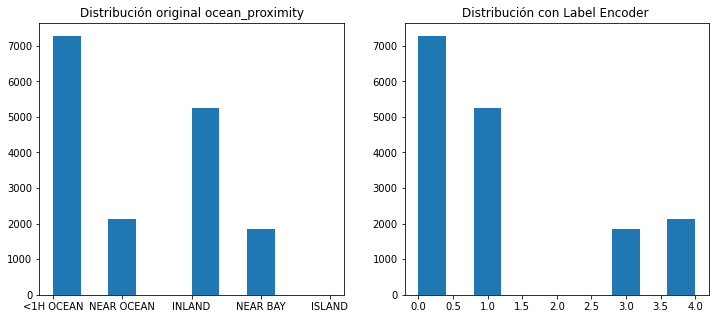

In [94]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['ocean_proximity'])
ax1.title.set_text('Distribución original')
ax2.hist(housing1['ocean_proximity_LE'])
ax2.title.set_text('Distribución con Label Encoding ')
plt.show()

## 2. Codificación binaria

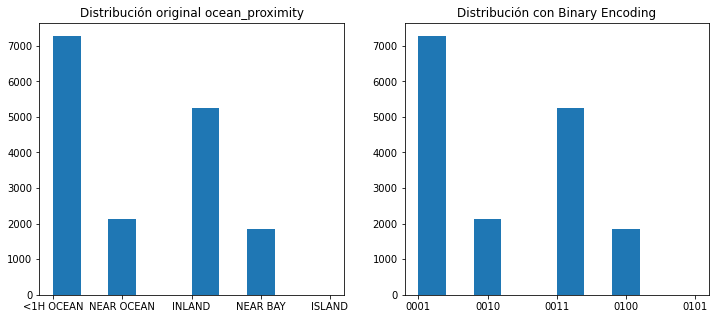

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['ocean_proximity'])
ax1.title.set_text('Distribución original')

df = housing2['ocean_proximity_0'].map(str) + housing2['ocean_proximity_1'].map(str) + housing2['ocean_proximity_2'].map(str) + housing2['ocean_proximity_3'].map(str)

ax2.hist(df)
ax2.title.set_text('Distribución con Codificación binaria')
plt.show()

## 3. Codificación de frencuencias

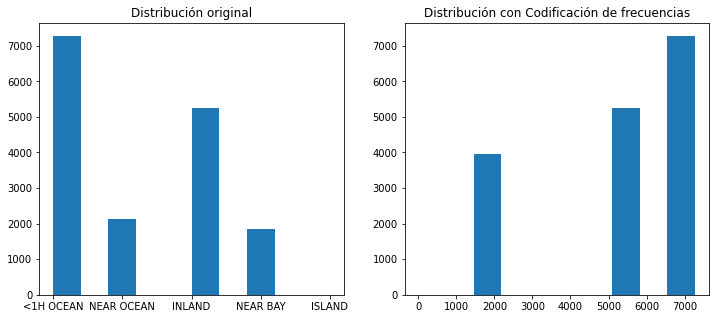

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['ocean_proximity'])
ax1.title.set_text('Distribución original')
ax2.hist(housing3['ocean_proximity_fe'])
ax2.title.set_text('Distribución con Codificación de frecuencias')
plt.show()

## 4. Transformación logaritmica

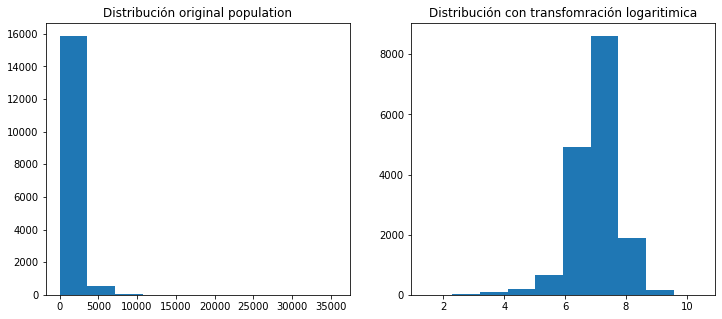

In [118]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['population'])
ax1.title.set_text('Distribución original population')
ax2.hist(housing4['population_log'])
ax2.title.set_text('Distribución con transfomración logaritimica')
plt.show()

## 5. Transformación escala min-max

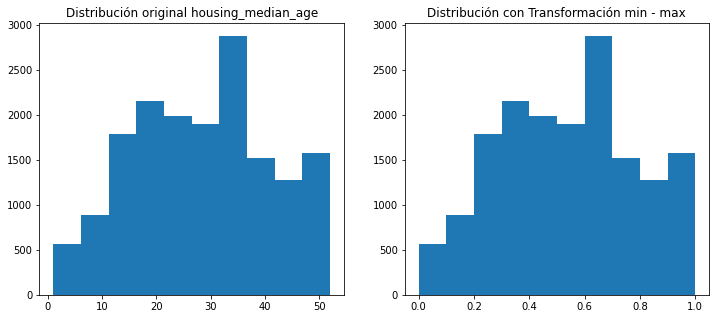

In [105]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['housing_median_age'])
ax1.title.set_text('Distribución original housing_median_age')
ax2.hist(housing5['housing_median_age_min_max'])
ax2.title.set_text('Distribución con Transformación min - max')
plt.show()

## 6. Estandarización

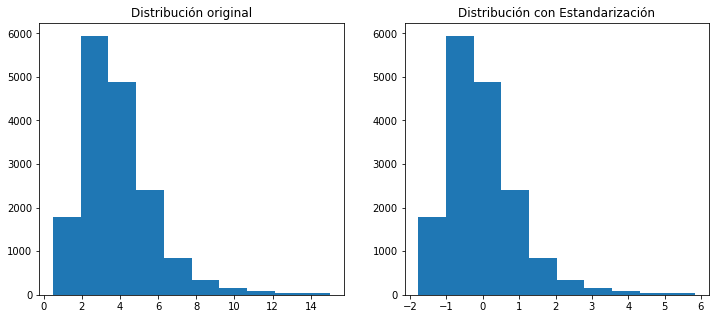

In [106]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(housing['median_income'])
ax1.title.set_text('Distribución original')
ax2.hist(housing6['median_income_est'])
ax2.title.set_text('Distribución con Estandarización')
plt.show()